# Exploratory Data Analysis

In [107]:
# Import libraries needed in this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

%matplotlib inline

# Load the data, we use the PassengerId as the row index.
data = pd.read_csv("./train.csv", index_col = 'PassengerId')
display(data.head(n=1000))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
# Show column names
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# count the number of values for each feature
data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

## An overview of the training data

- There are 891 training samples and each sample has 11 attributes.


### Attribute Summary

- **Survived:** (Categorical) 0:not survived, 1: survived. We take it as the label of the training data. 

- **Pclass:** (Categorical) 1: 1st, 2: 2nd, 3: 3rd 

- **Name:** (Categorical) Strings

- **Sex:** (Categorical) female, male

- **Age:** (Numerical) continuous

- **SibSp:** (Numerical) discrete

- **Parch:** (Numerical) discrete

- **Ticket:** (Categorical) Strings with alphanumeric characters

- **Fare:** (Numerical) continuous

- **Cabin:** (Categorical) Strings with alphanumeric characters

- **Embarked:** (Categorical) C: Cherbourg, Q: Queenstown, S: Southampton


### Combine similar features and Split features and labels
- PassengerId, ticket and name are one-to-one and they both serve indices of data, so we will remove them.

- The column of 'Survived' will serve as the label vector of our model.

### Feature Selection

We view 'Name', 'Ticket' as just indices of the data, since we already have the index PassengerId, so we drop these two features.

In [25]:
# Split the data into features and target label.
survive_raw = data['Survived']
features_raw = data.drop(['Survived', 'Name', 'Ticket'], axis = 1)
survive_raw.head(n = 2)

PassengerId
1    0
2    1
Name: Survived, dtype: int64

In [26]:
features_raw.head(n = 5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S
2,1,female,38.0,1,0,71.2833,C85,C
3,3,female,26.0,0,0,7.9250,NaN,S
4,1,female,35.0,1,0,53.1000,C123,S
5,3,male,35.0,0,0,8.0500,NaN,S


### Distributions of continuous variables

We draw the histograms of two continuous variables 'Age' and 'Fare'. This helps us understand the distributions of these two variables and from there we may transform the data accordingly before feeding them into the model. 

Text(0.5, 0, 'Fare')

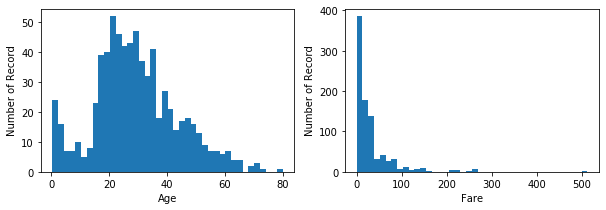

In [27]:
# draw a histogram
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(10,3))
plt.subplot(1,2, 1)
plt.hist(data['Age'], density=False, bins=40)
plt.ylabel('Number of Record')
plt.xlabel('Age')
plt.subplot(1,2,2)
plt.hist(data['Fare'], density=False, bins=40)
plt.ylabel('Number of Record')
plt.xlabel('Fare')


#### Transforming Data

- The empirical distribution of the variable 'Fare' is highly skewed, so we apply a logarithmic transformation on it so that the new distribution is less sensitive to outliers.

- We then apply the min-max normalization to the two numerical variables: Age and Fare

In [28]:
# Log-transform the skewed features
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed['Fare'] = features_raw['Fare'].apply(lambda x: np.log(x + 1))

In [29]:
features_log_transformed

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,2.110213,NaN,S
2,1,female,38.0,1,0,4.280593,C85,C
3,3,female,26.0,0,0,2.188856,NaN,S
4,1,female,35.0,1,0,3.990834,C123,S
5,3,male,35.0,0,0,2.202765,NaN,S
...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,2.639057,NaN,S
888,1,female,19.0,0,0,3.433987,B42,S
889,3,female,NaN,1,2,3.196630,NaN,S


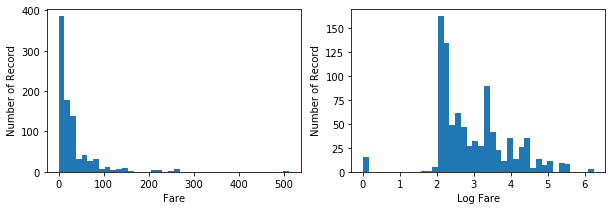

In [30]:
# Compare distributions of the variable Fare before and after applying the log transform
plt.figure(figsize=(10,3))
plt.subplot(1,2, 1)
plt.hist(data['Fare'], density=False, bins=40) # density=False would make counts
plt.ylabel('Number of Record')
plt.xlabel('Fare')
plt.subplot(1,2,2)
plt.hist(features_log_transformed['Fare'], density=False, bins=40)
plt.ylabel('Number of Record')
plt.xlabel('Log Fare');

In [31]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'Fare']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,0.271174,1,0,0.338125,NaN,S
2,1,female,0.472229,1,0,0.685892,C85,C
3,3,female,0.321438,0,0,0.350727,NaN,S
4,1,female,0.434531,1,0,0.639463,C123,S
5,3,male,0.434531,0,0,0.352955,NaN,S


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Age')

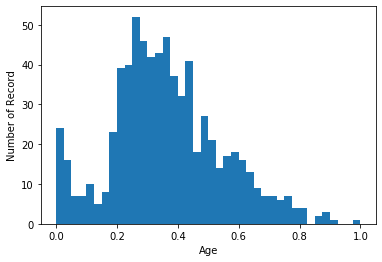

In [32]:
plt.hist(features_log_minmax_transform['Age'], density=False, bins=40)
plt.ylabel('Number of Record')
plt.xlabel('Age')

### Handling missing values

From the exploratory data analysis we oberserve that there are three features with missing values: Age, Cabin and Embarked. We will use three different methods to handle the missing values.

- Cabin: Most of the values are missing, so we may drop this feature without losing too much information.

- Embarked: Two values are missing and the data is categorical, we create another category called unknown and use this as the value for the two missing data.

- Age: About 20% of the data is missing, since the data is continuous, we will use the mean of the valid data as the value for the missing positions.



In [33]:
# drop the column of Cabin
features_log_minmax_transform = features_log_minmax_transform.drop('Cabin', axis = 1)

In [34]:
features_log_minmax_transform

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,0.271174,1,0,0.338125,S
2,1,female,0.472229,1,0,0.685892,C
3,3,female,0.321438,0,0,0.350727,S
4,1,female,0.434531,1,0,0.639463,S
5,3,male,0.434531,0,0,0.352955,S
...,...,...,...,...,...,...,...
887,2,male,0.334004,0,0,0.422864,S
888,1,female,0.233476,0,0,0.550238,S
889,3,female,NaN,1,2,0.512205,S


In [39]:
# compute the mean of existent 
features_log_minmax_transform['Age'].mean()

0.36792055349407904

In [40]:
features_temp = pd.DataFrame(data = features_log_minmax_transform)
features_temp['Age'] = features_log_minmax_transform['Age'].replace(np.NaN, features_log_minmax_transform['Age'].mean())

In [41]:
features_temp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,0.271174,1,0,0.338125,S
2,1,female,0.472229,1,0,0.685892,C
3,3,female,0.321438,0,0,0.350727,S
4,1,female,0.434531,1,0,0.639463,S
5,3,male,0.434531,0,0,0.352955,S
...,...,...,...,...,...,...,...
887,2,male,0.334004,0,0,0.422864,S
888,1,female,0.233476,0,0,0.550238,S
889,3,female,0.367921,1,2,0.512205,S


In [42]:
features_final = pd.DataFrame(data = features_temp)
features_final['Embarked'] = features_temp['Embarked'].fillna('Unknown')

In [43]:
features_temp.count()

Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

### Data preprocessing-one-hot encoding for the categorical variables

In [45]:
# one-hot encoding of the categorical features
features_final = pd.get_dummies(features_final)

In [46]:
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

11 total features after one-hot encoding.
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Unknown']


In [24]:
features_final

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,3,0.271174,1,0,0.338125,0,1,0,0,1,0
1,1,0.472229,1,0,0.685892,1,0,1,0,0,0
2,3,0.321438,0,0,0.350727,1,0,0,0,1,0
3,1,0.434531,1,0,0.639463,1,0,0,0,1,0
4,3,0.434531,0,0,0.352955,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0.334004,0,0,0.422864,0,1,0,0,1,0
887,1,0.233476,0,0,0.550238,1,0,0,0,1,0
888,3,0.367921,1,2,0.512205,1,0,0,0,1,0
889,1,0.321438,0,0,0.550238,0,1,1,0,0,0


### Train_test_split

- We first check the balance of data. From the computation below we see the data is balanced.

In [48]:
# compute the numbers of positive and negative samples to check the balance of data.
n_records = data['Survived'].count()
n_survived = data['Survived'].sum()
print("Total number of records: {}".format(n_records))
print("Total number of survivors: {}".format(n_survived))

Total number of records: 891
Total number of survivors: 342


In [50]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(features_final, 
                                                    survive_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))

Training set has 712 samples.
Validation set has 179 samples.


# Model

## Naive Predictor Performance

We first chose a baseline model that predicts all female would survive and obtain some baseline scores.


In [51]:
n_records = data['Survived'].count()
n_female = data[data['Sex'] == 'female']['Sex'].count()
n_survived = data['Survived'].sum()
n_female_survived = data[data['Survived'] == 1][data['Sex'] == 'female']['Sex'].count()
print("Total number of records: {}".format(n_records))
print("Total number of female: {}".format(n_female))
print("Total number of survivors: {}".format(n_survived))
print("Total number of female survivors: {}".format(n_female_survived))

TP = n_female_survived
FP = n_female - n_female_survived
FN = n_survived - n_female_survived
TN = (n_records - n_female) - FN
accuracy = (TP + TN) / n_records
recall = TP / n_survived
precision = TP / (TP + FP)

beta = 1
fscore = (1 + beta*beta) * (recall * precision)/(beta*beta*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Total number of records: 891
Total number of female: 314
Total number of survivors: 342
Total number of female survivors: 233
Naive Predictor: [Accuracy score: 0.7868, F-score: 0.7104]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


### Pipeline for training and evaluating different models

In [54]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train, beta = 1)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 1)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Initial Model Evaluation

We compare three classification models: Logistic Regression, kNN and RandomForest.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LogisticRegression trained on 71 samples.
LogisticRegression trained on 71 samples.
{'train_time': 0.0017228126525878906, 'pred_time': 0.0012478828430175781, 'acc_train': 0.7893258426966292, 'acc_test': 0.7821229050279329, 'f_train': 0.7126436781609196, 'f_test': 0.711111111111111}
LogisticRegression trained on 356 samples.
LogisticRegression trained on 356 samples.
{'train_time': 0.002191781997680664, 'pred_time': 0.0013229846954345703, 'acc_train': 0.8047752808988764, 'acc_test': 0.7988826815642458, 'f_train': 0.7236580516898609, 'f_test': 0.71875}
LogisticRegression trained on 712 samples.
LogisticRegression trained on 712 samples.
{'train_time': 0.0028061866760253906, 'pred_time': 0.0011219978332519531, 'acc_train': 0.797752808988764, 'acc_test': 0.7988826815642458, 'f_train': 0.7230769230769232, 'f_test': 0.7391304347826085}
KNeighborsClassifier trained on 71 samples.
KNeighborsClassifier trained on 71 samples.
{'train_time': 0.0011239051818847656, 'pred_time': 0.02161574363708496

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 71 samples.
RandomForestClassifier trained on 71 samples.
{'train_time': 0.011527776718139648, 'pred_time': 0.0033512115478515625, 'acc_train': 0.7598314606741573, 'acc_test': 0.7374301675977654, 'f_train': 0.6827458256029685, 'f_test': 0.6356589147286822}
RandomForestClassifier trained on 356 samples.
RandomForestClassifier trained on 356 samples.
{'train_time': 0.011397123336791992, 'pred_time': 0.0030231475830078125, 'acc_train': 0.875, 'acc_test': 0.8156424581005587, 'f_train': 0.8216432865731463, 'f_test': 0.717948717948718}
RandomForestClassifier trained on 712 samples.
RandomForestClassifier trained on 712 samples.
{'train_time': 0.012458086013793945, 'pred_time': 0.0029058456420898438, 'acc_train': 0.9578651685393258, 'acc_test': 0.8268156424581006, 'f_train': 0.9436090225563909, 'f_test': 0.7559055118110236}


/Users/dragonwarrior/Desktop/kaggle projects/visuals.py:121: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


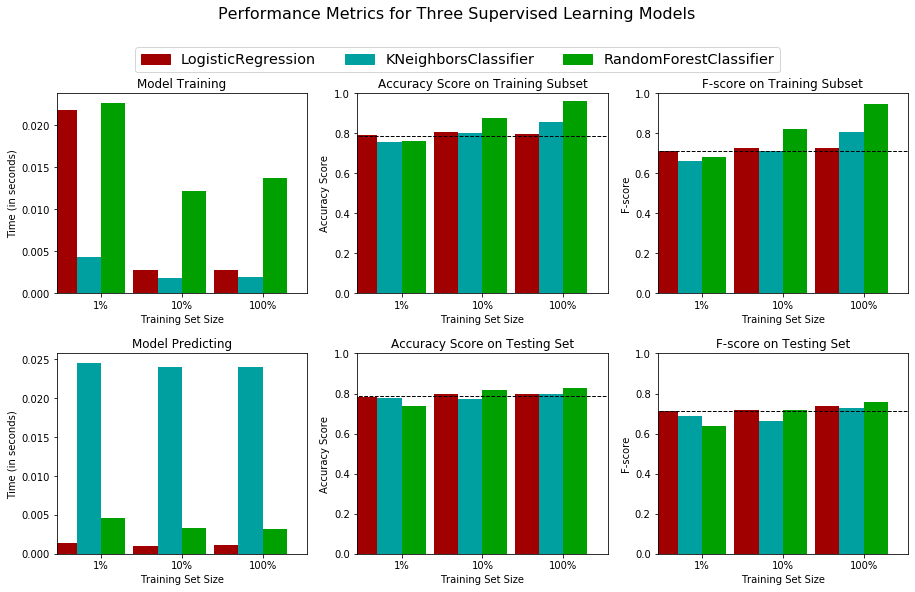

In [58]:
# TODO: Import the three supervised learning models from sklearn
import visuals as vs
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import random
random.seed(0)
# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=0)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=0)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = len(y_train) // 2
samples_1 = len(y_train) // 10

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_val, y_val)
        print(train_predict(clf, samples, X_train, y_train, X_val, y_val))

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(random_state=0)

parameters = {'max_depth': [2, 4, 6,100], 'n_estimators': [10, 100, 200], 'min_samples_leaf': [1, 2, 4, 10]}

scorer = make_scorer(fbeta_score, beta = 1)

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_val, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 1)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 1)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8268
F-score on testing data: 0.7559

Optimized Model
------
Final accuracy score on the testing data: 0.8324
Final F-score on the testing data: 0.7727


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Feature Importance Analysis

This part helps us analyze which features are important for the model chosen. We could use the wisdom to optimize our model from different perspectives such as performance, running time and etc. 

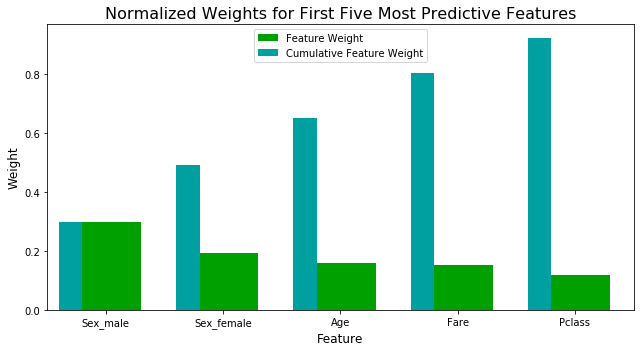

In [73]:
model = best_clf

importances = model.feature_importances_

vs.feature_plot(importances, X_train, y_train)

In [74]:
test_data = pd.read_csv("./test.csv")
display(test_data.head(n=100))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


In [75]:
test_data.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [76]:
features_test_raw = pd.DataFrame(data = test_data).set_index('PassengerId')
features_test_raw = features_test_raw.drop(['Name', 'Ticket'], axis = 1)

In [77]:
features_test_log_transformed = pd.DataFrame(data = features_test_raw)
features_test_log_transformed['Fare'] = features_test_raw['Fare'].apply(lambda x: np.log(x + 1))

In [78]:
features_test_log_transformed.loc[1044]

Pclass         3
Sex         male
Age         60.5
SibSp          0
Parch          0
Fare         NaN
Cabin        NaN
Embarked       S
Name: 1044, dtype: object

In [79]:
features_test_log_transformed['Fare'].index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [80]:
a = features_test_log_transformed['Fare'].index
b = features_test_log_transformed['Fare'].isnull()
for i in a:
    if b[i] == True:
        print(i)

1044


In [81]:
features_test_log_transformed['Fare'][1044]

nan

In [82]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'Fare']

features_test_log_minmax_transform = pd.DataFrame(data = features_test_log_transformed)
features_test_log_minmax_transform[numerical] = scaler.fit_transform(features_test_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_test_log_minmax_transform.head(n = 5))

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,male,0.452723,0,0,0.348997,NaN,Q
893,3,female,0.617566,1,0,0.333195,NaN,S
894,2,male,0.815377,0,0,0.379604,NaN,Q
895,3,male,0.353818,0,0,0.363449,NaN,S
896,3,female,0.287881,1,1,0.414494,NaN,S


In [83]:
features_test_log_minmax_transform = features_test_log_minmax_transform.drop('Cabin', axis = 1)

In [84]:
features_test_log_minmax_transform['Age'].mean()
features_test_temp = pd.DataFrame(data = features_test_log_minmax_transform)
features_test_temp['Age'] = features_test_log_minmax_transform['Age'].replace(np.NaN, features_test_log_minmax_transform['Age'].mean())

In [85]:
features_test_temp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,0.452723,0,0,0.348997,Q
893,3,female,0.617566,1,0,0.333195,S
894,2,male,0.815377,0,0,0.379604,Q
895,3,male,0.353818,0,0,0.363449,S
896,3,female,0.287881,1,1,0.414494,S
...,...,...,...,...,...,...,...
1305,3,male,0.396975,0,0,0.352955,S
1306,1,female,0.512066,0,0,0.753026,C
1307,3,male,0.505473,0,0,0.338125,S


In [86]:
features_test_temp.count()

Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Fare        417
Embarked    418
dtype: int64

In [87]:
a = features_test_temp['Fare'].isnull()
a.head(n=415)
    

PassengerId
892     False
893     False
894     False
895     False
896     False
        ...  
1302    False
1303    False
1304    False
1305    False
1306    False
Name: Fare, Length: 415, dtype: bool

In [88]:
fare_fill = features_test_temp[features_test_temp['Pclass'] == 3]['Fare'].mean()

In [89]:
features_test_final = pd.DataFrame(data = features_test_temp)
features_test_final['Fare'] = features_test_temp['Fare'].fillna(fare_fill )

In [90]:
features_test_final

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,0.452723,0,0,0.348997,Q
893,3,female,0.617566,1,0,0.333195,S
894,2,male,0.815377,0,0,0.379604,Q
895,3,male,0.353818,0,0,0.363449,S
896,3,female,0.287881,1,1,0.414494,S
...,...,...,...,...,...,...,...
1305,3,male,0.396975,0,0,0.352955,S
1306,1,female,0.512066,0,0,0.753026,C
1307,3,male,0.505473,0,0,0.338125,S


In [91]:
features_test_temp.count()

Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Fare        418
Embarked    418
dtype: int64

In [92]:
features_test_final = pd.get_dummies(features_test_final)

In [93]:
# Print the number of features after one-hot encoding
encoded = list(features_test_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

10 total features after one-hot encoding.
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [94]:
features_test_final

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,0.452723,0,0,0.348997,0,1,0,1,0
893,3,0.617566,1,0,0.333195,1,0,0,0,1
894,2,0.815377,0,0,0.379604,0,1,0,1,0
895,3,0.353818,0,0,0.363449,0,1,0,0,1
896,3,0.287881,1,1,0.414494,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,3,0.396975,0,0,0.352955,0,1,0,0,1
1306,1,0.512066,0,0,0.753026,1,0,1,0,0
1307,3,0.505473,0,0,0.338125,0,1,0,0,1


In [95]:
features_test_final['Embarked_Unknown'] = [0] * 418

In [96]:
y_predict = best_clf.predict(features_test_final)

In [97]:
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
features_test_final['Survived'] = y_predict

In [102]:
features_test_final

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Survived
PassengerId,,,,,,,,,,,,
892,3,0.452723,0,0,0.348997,0,1,0,1,0,0,0
893,3,0.617566,1,0,0.333195,1,0,0,0,1,0,1
894,2,0.815377,0,0,0.379604,0,1,0,1,0,0,0
895,3,0.353818,0,0,0.363449,0,1,0,0,1,0,0
896,3,0.287881,1,1,0.414494,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0.396975,0,0,0.352955,0,1,0,0,1,0,0
1306,1,0.512066,0,0,0.753026,1,0,1,0,0,0,1
1307,3,0.505473,0,0,0.338125,0,1,0,0,1,0,0


In [103]:
submission = pd.DataFrame(data = features_test_final)
submission = submission.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Unknown'], axis = 1)

In [106]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [104]:
submission.sum()

Survived    146
dtype: int64

In [105]:
# Output the predictions
submission.to_csv('submission.csv')